# **Laboratorijska vježba 3**: Zadaci za samostalni rad

## **Podaci iz popisa stanovništa u SAD-u iz 2015. godine**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka dobiven iz popisa stanovništva 2015. godine u SAD-u. Skup podataka dostupan je u *Data/acs2015_county_data.csv*. 


In [2]:
!head Data/acs2015_county_data.csv

CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6,33.2,17.0,24.2,8.6,17.1,87.5,8.8,0.1,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2,33.1,17.7,27.1,10.8,11.2,84.7,8.8,0.1,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3,26.8,16.1,23.1,10.8,23.1,83.8,10.9,0.4,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [4]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [5]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

## **Zadatak 1: Izračun deskriptivne statistike i testiranje distribucija**

Za numeričke varijable u skupu podataka izračunajte osnovne mjere u okviru deskriptivne statistike. Zatim se fokusirajte na dohodak po stanovniku države (*IncomePerCap*). Koliko u prosjeku zarađuju stanovnici SAD-a? Kolika je medijalna plaća? 

In [21]:
df.describe()
print("Mean: ", df.IncomePerCap.mean())
print("Median: ", df.IncomePerCap.median())

Mean:  23981.771739130436
Median:  23460.0


Pokušajte steći dublji uvid u prihod po stanovniku. Može li se prepoznati distribucija iz koje potječi ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.0637621121184162, 0.0009999999999998899)

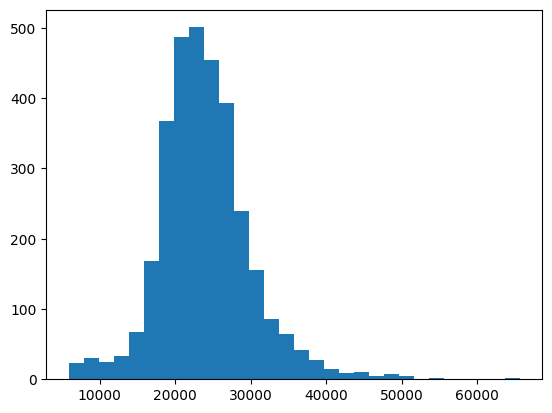

In [7]:
plt.hist(df.IncomePerCap, bins=30)
diagnostic.kstest_normal(df.IncomePerCap, dist="norm")

Izračunajte osnovne mjere u okviru deskriptivne statistike za broj stanovnika države (*TotalPop*) te prokomentirajte dobivene rezultate.

In [9]:
df.TotalPop.describe()

count    3.220000e+03
mean     9.940935e+04
std      3.193055e+05
min      8.500000e+01
25%      1.121800e+04
50%      2.603500e+04
75%      6.643050e+04
max      1.003839e+07
Name: TotalPop, dtype: float64

Pokušajte steći dublji uvid u broj stanovnika. Može li se prepoznati distribucija iz koje potječu ovi podaci? Potkrijepite Vaš zaključak grafičkom metodom i rezultatima statističkog testa.

(0.37787608613878587, 0.0009999999999998899)

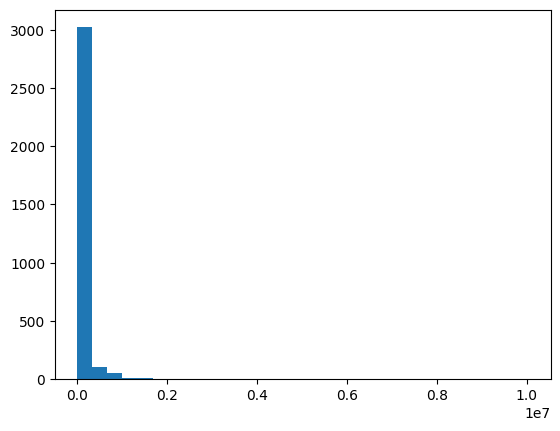

In [23]:
plt.hist(df.TotalPop, bins=30)
diagnostic.kstest_normal(df.TotalPop, dist="norm")

## **Zadatak 2: Ispitivanje odnosa između dvije varijable**

Pokušajte odgovoriti na pitanje je li dohodak po stanovniku države u korelaciji s nezaposlenošću. Ispitajte i linearnu i monotonu korelaciju.

In [11]:
stats.pearsonr(df.IncomePerCap, df.Unemployment)

PearsonRResult(statistic=-0.5475960044237933, pvalue=2.0438343129206717e-251)

In [12]:
stats.spearmanr(df.IncomePerCap, df.Unemployment)

SignificanceResult(statistic=-0.5610346008485645, pvalue=1.861766816019713e-266)

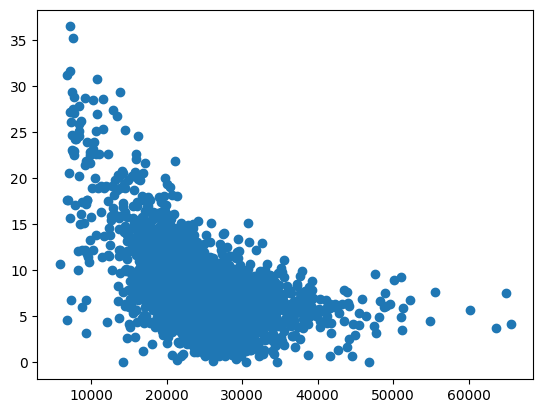

In [13]:
plt.scatter(df.IncomePerCap, df.Unemployment)

## **Zadatak 3: Testiranje hipoteza**

Zarađuju li stanovnici države New York više od stanovnika države Kalifornija? Pokušajte dati odgovor na ovo pitanje pomoću deskriptivne statistike.

In [14]:
ny = df[df["State"]=="New York"]["IncomePerCap"].describe()
ca = df[df["State"]=="California"]["IncomePerCap"].describe()
print("NY: ", ny)
print("CA: ", ca)

NY:  count       62.000000
mean     28189.758065
std       7196.801210
min      18456.000000
25%      24255.750000
50%      25891.000000
75%      30319.250000
max      64993.000000
Name: IncomePerCap, dtype: float64
CA:  count       58.000000
mean     27902.603448
std       8672.312531
min      16143.000000
25%      21409.000000
50%      27146.500000
75%      31214.500000
max      60236.000000
Name: IncomePerCap, dtype: float64


Kako bi potkrijepili dobivene zaključke, provedite testiranje hipoteza. Neka nulta hipoteza pretpostavlja da nema statistički značajne razlike u dohotku stanovnika ovih država. Testirajte hipotezu pomoću dvostranog t-testa (*two-sided t-test*). Prokomentirajte dobivenu $p$-vrijednost te donesite zaključak.

In [15]:
stats.ttest_ind(a=ny, b=ca, equal_var=True)

Ttest_indResult(statistic=0.08806202612377481, pvalue=0.9310746389336766)

## **Zadatak 4: Kvantificiranje nesigurnosti**

Ponovno promotrimo pitanje zarađuju li stanovnici države New York više od stanovnika države Kalifornija. Ovaj put pokušajte odgovoriti na pitanje pomoću intervala pouzdanosti s razinom pouzdanosti od 95%. Uz izračun, vizualizirajte intervale pouzdanosti na stupčastim dijagramima. 
Pomoć: provjerite preklapaju li se intervali za ove države.

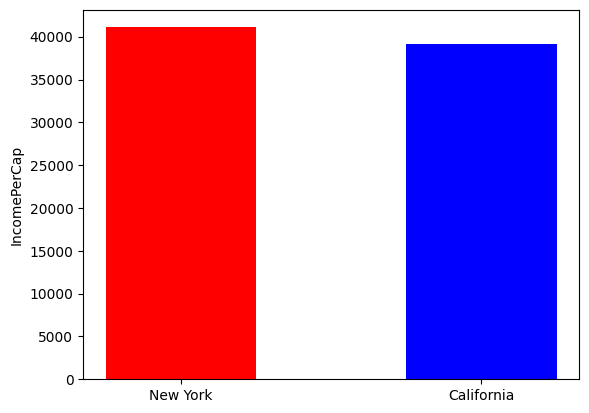

In [16]:
ny_pouzdanost = stats.t.interval(confidence=0.95, df=len(ny)-1, loc=np.mean(ny), scale=stats.sem(ny))
ca_pouzdanost = stats.t.interval(confidence=0.95, df=len(ca)-1, loc=np.mean(ca), scale=stats.sem(ca))

fig, ax = plt.subplots()

ax.bar("New York", ny_pouzdanost, color="red", width=0.5)
ax.bar("California", ca_pouzdanost, color="blue", width=0.5)

ax.set_ylabel("IncomePerCap")
plt.show()

## **Zadatak 5: Jačanje gospodarstva poticanjem samozapošljavanja**

Pretpostavimo da je najveći prioritet lokalne uprave u 2018. godini povećanje dohotka po glavi stanovnika. U tu svrhu, dužnosnici planiraju usvojiti strategiju poticanja samozapošljavanja kroz niz kampanja, obrazovnih programa i namjenskih sredstava.

Budući da je neetično i nemoguće u ovom okruženju provoditi kontrolirani eksperiment koji uključuje građane (primjerice, otpustiti zaposlenike i prisiliti ih na samozapošljavanje), dužnosnici su od Vas zatražili da utvrdite učinak samozapošljavanja na gospodarstva, oslanjajući se na podatke iz danog skupa podataka.

Koristeći odgovarajuće grafičke i statističke metode, odredite i kvantificirajte vezu između postotka samozaposlenih građana (*SelfEmployed*) i dohotka po glavi stanovnika u svih 3212 država SAD-a. Zarađuju li građani u državama koje imaju veći postotak samozaposlenih više po glavi stanovnika?

0.08727386609551795

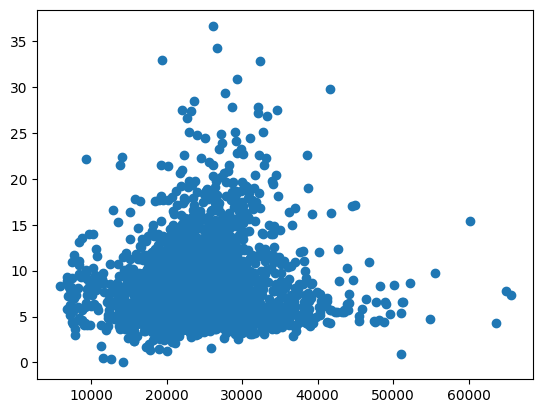

In [39]:
income_per_cap = df["IncomePerCap"]
self_employed = df["SelfEmployed"]
plt.scatter(income_per_cap, self_employed)
income_per_cap.corr(self_employed)

Pilot program ove strategije zahvatit će sve okruge unutar ograničenog skupa od tri države. Skup A uključuje Wisconsin, Tennessee i Minnesotu. Kvantificirajte ovisnost dohotka po glavi stanovnika o stopama samozapošljavanja u skupu A.

-0.20229350736521498

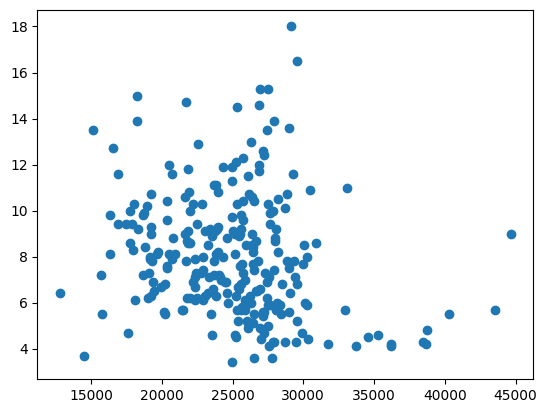

In [40]:
group_a = df.query("State=='Wisconsin' | State=='Tennessee' | State=='Minnesota'")
group_a_income_per_cap = group_a["IncomePerCap"]
group_a_self_employed = group_a["SelfEmployed"]
plt.scatter(group_a_income_per_cap, group_a_self_employed)
group_a_income_per_cap.corr(group_a_self_employed)

U kojoj je državi unutar skupa A opaženi učinak samozapošljavanja na dohodak po glavi stanovnika najjači? Je li ovaj učinak pozitivan ili negativan?

In [48]:
wi_ipc = group_a[group_a["State"]=="Wisconsin"].IncomePerCap
wi_se = group_a[group_a["State"]=="Wisconsin"].SelfEmployed
wi_ipc.corr(wi_se)

-0.32905300016378525

In [49]:
tn_ipc = group_a[group_a["State"]=="Tennessee"].IncomePerCap
tn_se = group_a[group_a["State"]=="Tennessee"].SelfEmployed
tn_ipc.corr(tn_se)

-0.23836048684913158

In [50]:
mi_ipc = group_a[group_a["State"]=="Minnesota"].IncomePerCap
mi_se = group_a[group_a["State"]=="Minnesota"].SelfEmployed
mi_ipc.corr(mi_se)

-0.2538551921654063

Skup B uključuje države New Jersey, Kansas i Rhode Island. Ponovite analizu iz prijašnjih koraka, ali sada za skup B. U kojem biste od dva skupa A i B preporučili poticanje samozapošljavanja? Objasnite svoje razmišljanje. Što zamjećujete kad u oba skupa promatrate korelaciju unutar svake pojedine države, a što kada promatrate korelaciju za države u cjelini?

-0.2322214134608568

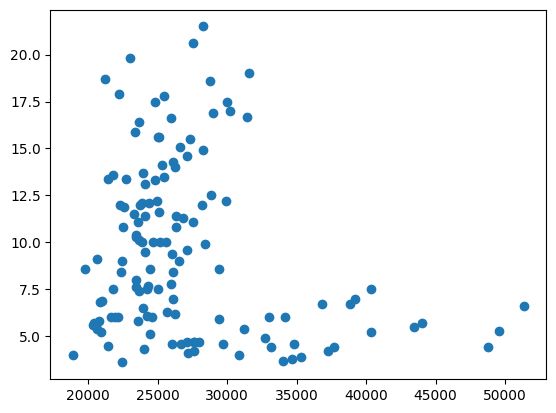

In [66]:
group_b = df.query("State=='New Jersey' | State=='Kansas' | State=='Rhode Island'")
group_b_income_per_cap = group_b["IncomePerCap"]
group_b_self_employed = group_b["SelfEmployed"]
plt.scatter(group_b_income_per_cap, group_b_self_employed)
group_b_income_per_cap.corr(group_b_self_employed)


In [53]:
nj_ipc = group_b[group_b["State"]=="New Jersey"].IncomePerCap
nj_se = group_b[group_b["State"]=="New Jersey"].SelfEmployed
nj_ipc.corr(nj_se)

0.4804478471336282

In [54]:
ks_ipc = group_b[group_b["State"]=="Kansas"].IncomePerCap
ks_se = group_b[group_b["State"]=="Kansas"].SelfEmployed
ks_ipc.corr(ks_se)

0.25810299714436924

In [55]:
ri_ipc = group_b[group_b["State"]=="Rhode Island"].IncomePerCap
ri_se = group_b[group_b["State"]=="Rhode Island"].SelfEmployed
ri_ipc.corr(ri_se)

0.9021788382149803